### Pandas 108 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('Amazon_BooksDataset.csv')

**1. Get the names of all the columns**

In [5]:
df.columns

Index(['Book Name', 'Author', 'Pages', 'Language', 'Ratings', 'Total Ratings',
       'Price', 'Category'],
      dtype='object')

**2. Display the first 3 rows**

In [7]:
df.head(3)

,Book Name,Author,Pages,Language,Ratings,Total Ratings,Price,Category
0,11 Rules For Life: Secrets to Level Up,Chetan Bhagat,256.0,English,4.5,735,183,Self Improvement
1,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
2,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature


**3. Display 4 random rows from the dataframe**

In [9]:
df.sample(4)

,Book Name,Author,Pages,Language,Ratings,Total Ratings,Price,Category
228,The Hobbit: Illustrated Edition: Or There and ...,J.R.R. Tolkien,384.0,English,4.9,"6,055","2,994.00",Religion and Spirtuality
218,The Complete Novels of Sherlock Holmes [Paperb...,Arthur Conan Doyle,536.0,English,4.4,"20,458",189,Literature
64,Doglapan : The Hard Truth about Life and Start...,ASHNEER GROVER,256.0,English,4.3,"3,221",286,Finance
101,I AM MALALA (ADULT REGULAR B FORMAT) [Paperbac...,Malala Yousafzai,320.0,English,4.5,"17,246",333,Political


**4. What is the total number of rows in the dataset?**

In [11]:
df.shape[0]

320

**5. Rename 'Ratings' column to 'Average Rating'**

In [13]:
df = df.rename(columns={'Ratings': 'Average Rating'})

**6. Check if there are any duplicate rows**

In [15]:
df.duplicated().value_counts()  

False    241
True      79
Name: count, dtype: int64

**7. Remove any duplicate rows**

In [17]:
df = df.drop_duplicates()

**8. Remove rows where 'Average Rating' and 'Total Ratings' are missing**

In [19]:
df = df.dropna(subset=['Average Rating', 'Total Ratings'])

**9. Check the datatype of all the columns**

In [21]:
df.dtypes

Book Name          object
Author             object
Pages             float64
Language           object
Average Rating    float64
Total Ratings      object
Price              object
Category           object
dtype: object

**10. Remove comma from values in Price column and change the type to float64**

In [23]:
df['Price'] = df['Price'].str.replace(',', '').astype('float64')

**11. Remove comma from values in Total Ratings column and change the type to int64**

In [25]:
df['Total Ratings'] = df['Total Ratings'].str.replace(',', '').astype('int64')

**12. Check how many missing values are there in all columns**

In [27]:
df.isnull().sum()

Book Name          0
Author             2
Pages             24
Language           5
Average Rating     0
Total Ratings      0
Price             19
Category           0
dtype: int64

**13. Replace missing values in Author column with 'Unknown'**

In [29]:
df['Author'] = df['Author'].fillna('Unknown')

**14. Replace missing values in Language column with the most occuring langauge**

In [31]:
df.loc[:, 'Language'] = df['Language'].fillna(df['Language'].mode()[0]) 

**15. Replace missing values in Pages column with median and convert data of Pages column type to int64**

In [33]:
df['Pages'] = df['Pages'].fillna(df['Pages'].median())
df['Pages'] = df['Pages'].astype('int64')

**16. Fill missing values for price with the median price of the same category**

In [35]:
df['Price'] = df.groupby('Category')['Price'].transform(lambda x: x.fillna(x.median()))

**17. How many unique authors are listed?**

In [37]:
df['Author'].nunique()

201

**18. What are the top 5 most expensive books?**

In [39]:
df[['Book Name', 'Price']].nlargest(5, 'Price')

,Book Name,Price
67,Dungeons & Dragons Core Rulebooks Gift Set (Sp...,17913.0
222,"The CSB Study Bible For Women, Teal Flowers Le...",6416.0
274,The Woman's Study Bible: New International Ver...,5322.0
144,"Niv, Beautiful Word Bible, Updated Edition, Pe...",5177.0
266,The Silmarillion [Illustrated Edition]: Illust...,4573.0


**19. What are the 5 shortest books (based on the number of pages)?**  


In [41]:
df[['Book Name', 'Pages']].nsmallest(5,'Pages')

,Book Name,Pages
157,Preschool Activity Book: Brain Booster - Logic...,16
189,Star Light: Enchanting Messages from the Cosmo...,40
239,The Law,46
25,As a Man Thinketh [Paperback] James Allen,50
277,Thera-pets: 64 Emotional Support Animal Cards,64


**20. What is the average number of pages across all books?**


In [43]:
df['Pages'].mean()

316.6276150627615

**21. Display the summary statistics for numeric columns**



In [45]:
df.describe()

,Pages,Average Rating,Total Ratings,Price
count,239.000000,239.000000,239.000000,239.000000
mean,316.627615,4.573640,8311.062762,685.401674
std,290.225136,0.258664,18992.779955,1414.143079
min,16.000000,3.500000,1.000000,75.000000
25%,176.000000,4.400000,283.500000,199.000000
50%,256.000000,4.500000,1658.000000,286.000000
75%,320.000000,4.750000,5772.500000,545.500000
max,2240.000000,5.000000,143173.000000,17913.000000


**22. Find the unique values and their counts for the column 'Category', sort by category names**

In [47]:
df['Category'].value_counts().sort_index()

Category
Finance                     46
Literature                  49
Political                   48
Religion and Spirtuality    48
Self Improvement            48
Name: count, dtype: int64

**23. What are the top 5 languages with the most books listed?**


In [49]:
df['Language'].value_counts().head(5)

Language
English      215
Hindi         15
Telugu         3
Malayalam      3
Marathi        1
Name: count, dtype: int64

**24. What percentage of books have ratings greater than or equal to 4 stars?**

In [51]:
(df[df['Average Rating'] >= 4].shape[0] / df.shape[0]) * 100

98.32635983263597

**25. What is the average price of books and average number of pages across different languages?**

In [53]:
df.groupby('Language')[['Price', 'Pages']].mean()

,Price,Pages
Language,,
English,735.902326,321.860465
Hindi,235.666667,288.133333
Kannada,153.000000,152.000000
Malayalam,234.000000,224.000000
Marathi,250.000000,224.000000
Tamil,129.000000,224.000000
Telugu,274.333333,293.333333


**26. What is the average and maximum price of books, along with the average number of pages, across different languages?**

*Group the data by 'Language' and calculate the mean and maximum price, as well as the mean number of pages for each language.Use agg()*

In [56]:
df.groupby('Language').agg({'Price': ['mean', 'max'], 'Pages': 'mean'})

Price                Pages
                 mean      max        mean
Language                                  
English    735.902326  17913.0  321.860465
Hindi      235.666667    499.0  288.133333
Kannada    153.000000    153.0  152.000000
Malayalam  234.000000    288.0  224.000000
Marathi    250.000000    250.0  224.000000
Tamil      129.000000    129.0  224.000000
Telugu     274.333333    329.0  293.333333

**27. How do the average price and average number of pages differ across various languages and categories**

*Group by 'Language' and 'Category' and calculate the mean of 'Price' and 'Pages'*

In [59]:
grouped = df.groupby(['Language', 'Category'])[['Price', 'Pages']].mean()
grouped

Price       Pages
Language  Category                                         
English   Finance                    383.947368  251.921053
          Literature                 270.432432  397.783784
          Political                  380.250000  314.295455
          Religion and Spirtuality  2200.333333  396.145833
          Self Improvement           234.916667  251.354167
Hindi     Finance                    227.800000  239.600000
          Literature                 207.000000  290.333333
          Political                  288.500000  345.500000
Kannada   Finance                    153.000000  152.000000
Malayalam Finance                    169.000000  288.000000
          Literature                 266.500000  192.000000
Marathi   Literature                 250.000000  224.000000
Tamil     Finance                    129.000000  224.000000
Telugu    Literature                 274.333333  293.333333

**28. Extract the data for the 'English' language from the previously grouped DataFrame.**

In [61]:
grouped.loc['English']

,Price,Pages
Category,,
Finance,383.947368,251.921053
Literature,270.432432,397.783784
Political,380.250000,314.295455
Religion and Spirtuality,2200.333333,396.145833
Self Improvement,234.916667,251.354167


**29. Extract the data for the combination of 'English' language and 'Finance' category from the previously grouped DataFrame.**

In [63]:
grouped.loc[('English', 'Finance')]

Price    383.947368
Pages    251.921053
Name: (English, Finance), dtype: float64

**30. Which price range has the most number of books?**

In [65]:
pd.cut(df['Price'], bins=5).value_counts()

Price
(57.162, 3642.6]      232
(3642.6, 7210.2]        6
(14345.4, 17913.0]      1
(7210.2, 10777.8]       0
(10777.8, 14345.4]      0
Name: count, dtype: int64

**31. How many books have received more than 1000 ratings?**


In [67]:
df[df['Total Ratings'] > 1000].shape[0]

141

**32. Which book(s) has the highest rating?**


In [69]:
df[df['Average Rating'] == df['Average Rating'].max()][['Book Name', 'Average Rating']]

,Book Name,Average Rating
46,Can Conflict End?,5.0
48,Caste Away,5.0
60,Discovering Daniel: Finding Our Hope in God's ...,5.0
77,Giving Offence: 0 (Manifestos for the 21st Cen...,5.0
85,"Herbal Formularies for Health Professionals, V...",5.0
92,How To Make Money With Breakout Trading (Hindi),5.0
97,How to Stop Worrying and Start Living (Telugu),5.0
116,Judgement Day: Deeds That Light the Way,5.0
149,Passive Income Discovery: A Complete Guide to ...,5.0
188,"Srila Prabhupada-lilamrta, volume 1",5.0


**33. What is the average rating across different languages?**

In [71]:
df.groupby('Language')['Average Rating'].mean().sort_values(ascending=False)

Language
Telugu       4.733333
Kannada      4.600000
English      4.592558
Hindi        4.400000
Marathi      4.400000
Tamil        4.200000
Malayalam    4.100000
Name: Average Rating, dtype: float64

**34. Which authors have the highest average book ratings?**


In [73]:
df.groupby('Author')['Average Rating'].mean().nlargest(10)

Author
Amir Tsarfati          5.0
Dr. Jill Stansbury     5.0
Hosa  Smith-Zen        5.0
Indrazith Santharaj    5.0
J. Krishnamurti        5.0
Jay Sandron            5.0
Jessica Le             5.0
Joanne Shi             5.0
Martin Rowson          5.0
Na. Vanamamalai        5.0
Name: Average Rating, dtype: float64

**35. Display the longest book(max pages) written by each author.  Sort the result by Pages in descending order**

In [75]:
longest_books = df.loc[df.groupby('Author')['Pages'].idxmax()][['Author', 'Book Name', 'Pages']]
longest_books.sort_values(by='Pages', ascending=False)

,Author,Book Name,Pages
222,CSB Bibles by Holman CSB Bibles by Holman,"The CSB Study Bible For Women, Teal Flowers Le...",2240
274,Dorothy Kelley Patterson,The Woman's Study Bible: New International Ver...,2080
144,Zondervan Publishing House,"Niv, Beautiful Word Bible, Updated Edition, Pe...",1666
289,Various,"Top 50 World�s Greatest Short Stories, Speeche...",1536
82,Unknown,Greatest Love Stories of All Time Box Set of 4...,1448
...,...,...,...
298,Maple Press,Vikram and Betaal (Illustrated) - Story Book f...,72
277,Kate Allan,Thera-pets: 64 Emotional Support Animal Cards,64
239,Tony Darnell Frederic Bastiat,The Law,46
189,Jessica Le,Star Light: Enchanting Messages from the Cosmo...,40


**36. Display the total number of ratings received by each author.**



In [77]:
df.groupby('Author')['Total Ratings'].sum().sort_values(ascending = False)

Author
George Orwell          285670
Victor E. Frankl       171856
Mark Manson            143173
James Clear             93585
Robin Sharma            86609
                        ...  
J. Krishnamurti             4
Na. Vanamamalai             2
Jay Sandron                 1
Indrazith Santharaj         1
Martin Rowson               1
Name: Total Ratings, Length: 201, dtype: int64

**37. Find top 5 and bottom 5 authors based on total number of ratings received**

In [79]:
df.groupby('Author')['Total Ratings'].sum().nlargest(5)

Author
George Orwell       285670
Victor E. Frankl    171856
Mark Manson         143173
James Clear          93585
Robin Sharma         86609
Name: Total Ratings, dtype: int64

In [80]:
df.groupby('Author')['Total Ratings'].sum().nsmallest(5)

Author
Indrazith Santharaj    1
Jay Sandron            1
Martin Rowson          1
Na. Vanamamalai        2
J. Krishnamurti        4
Name: Total Ratings, dtype: int64

**38. Find the top 10 books with the highest number of total ratings.**


In [82]:
df.nlargest(10, 'Total Ratings')[['Book Name', 'Total Ratings']]

,Book Name,Total Ratings
270,The Subtle Art of Not Giving A F*ck : A Counte...,143173
1,1984 [Paperback] George Orwell,126238
28,Atomic Habits : the life-changing million-copy...,93585
130,Man's Search For Meaning: The classic tribute ...,85928
131,Man's Search For Meaning: The classic tribute ...,85928
18,Animal Farm,79675
17,Animal Farm,79674
259,The Psychology of Money,62884
107,Ikigai,54433
225,The Good Girl's Guide to Murder: Book 1 (A Goo...,52516


**39. Explore how many books exist in each category and language combination.**

In [84]:
df.groupby(['Category', 'Language']).size()

Category                  Language 
Finance                   English      38
                          Hindi         5
                          Kannada       1
                          Malayalam     1
                          Tamil         1
Literature                English      37
                          Hindi         6
                          Malayalam     2
                          Marathi       1
                          Telugu        3
Political                 English      44
                          Hindi         4
Religion and Spirtuality  English      48
Self Improvement          English      48
dtype: int64

**40 Identify the longest and shortest books by pages within each category.**

In [86]:
category_pages = df.groupby('Category')['Pages'].agg(['max', 'min'])
category_pages.rename(columns={'max': 'Max Pages', 'min': 'Min Pages'})

,Max Pages,Min Pages
Category,,
Finance,590,82
Literature,1536,16
Political,784,46
Religion and Spirtuality,2240,40
Self Improvement,512,96


**41. Plot a boxplot of the "Pages" column**

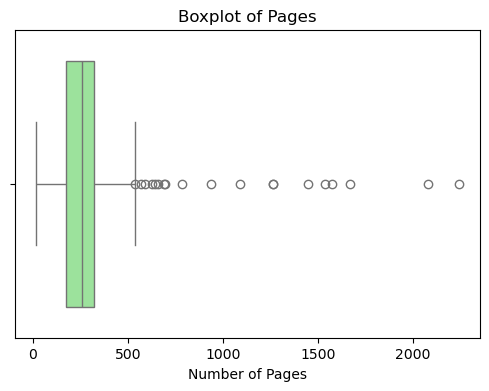

In [88]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Pages'], color='lightgreen')
plt.title('Boxplot of Pages')
plt.xlabel('Number of Pages')
plt.show()

**42. Plot a boxplot of the "Price" column**

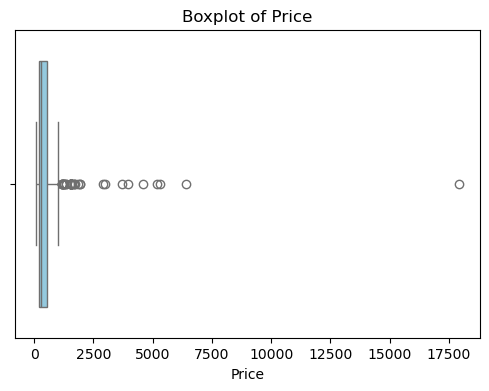

In [90]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

**43. Use the following function to remove outliers from Price and Pages column. Find the number of rows removed and plot boxplots for Price and Pages after removing the oultiers**

In [92]:
def remove_outliers(df, column, multiplier=1.5):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Remove outliers by filtering the column within the bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

In [93]:
df.shape[0] # Number of rows before removing outliers

239

In [94]:
df = remove_outliers(df, 'Pages')

In [95]:
df.shape[0] # Number of rows after removing Pages outliers

220

In [96]:
df = remove_outliers(df, 'Price')

In [97]:
df.shape[0]  # Number of rows after removing Pages outliers also

179

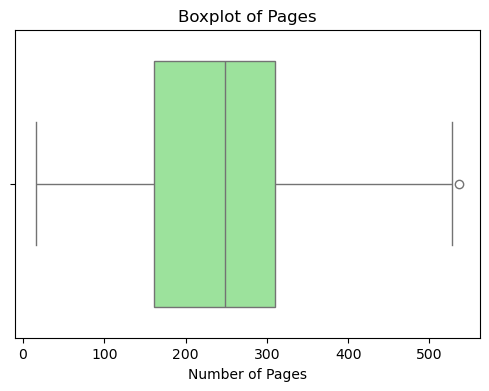

In [98]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Pages'], color='lightgreen')
plt.title('Boxplot of Pages')
plt.xlabel('Number of Pages')
plt.show()

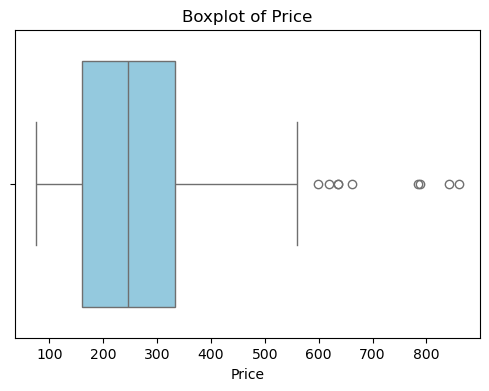

In [99]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

**44. Compare the distribution of book prices across different categories using box plots.**


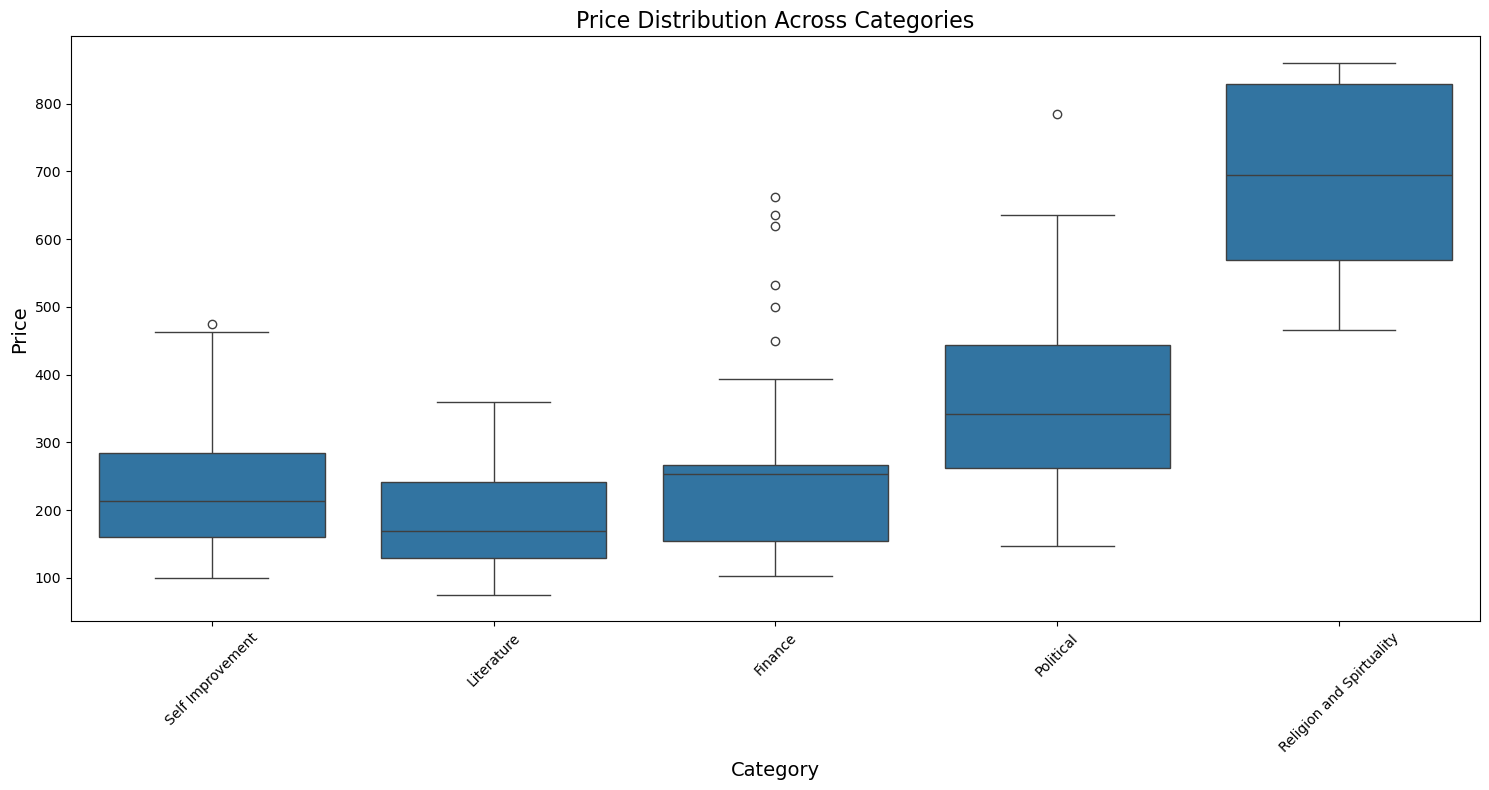

In [101]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()

**45. Explore how the average rating varies across different languages using a bar plot**


<Axes: xlabel='Language'>

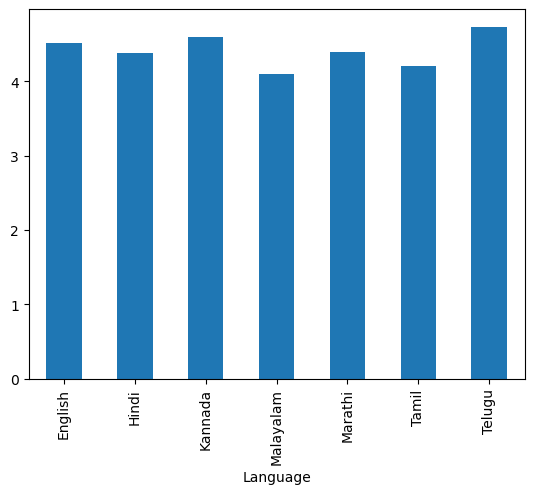

In [103]:
df.groupby('Language')['Average Rating'].mean().plot(kind='bar')

**46. Analyze the correlation between numerical variables such as Price, Pages, Average Rating, Total Ratings, etc.**

In [105]:
df.corr(numeric_only=True)

,Pages,Average Rating,Total Ratings,Price
Pages,1.000000,0.022017,-0.019089,0.327462
Average Rating,0.022017,1.000000,0.038770,0.273249
Total Ratings,-0.019089,0.038770,1.000000,-0.062443
Price,0.327462,0.273249,-0.062443,1.000000


**47. Visualize the correlation between book price and number of pages.**

<Axes: xlabel='Price', ylabel='Pages'>

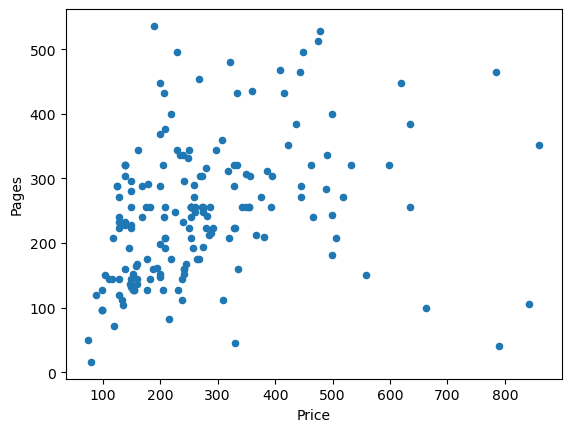

In [107]:
df.plot.scatter(x='Price', y='Pages')

**48. Plot a histogram for the distribution of ratings**

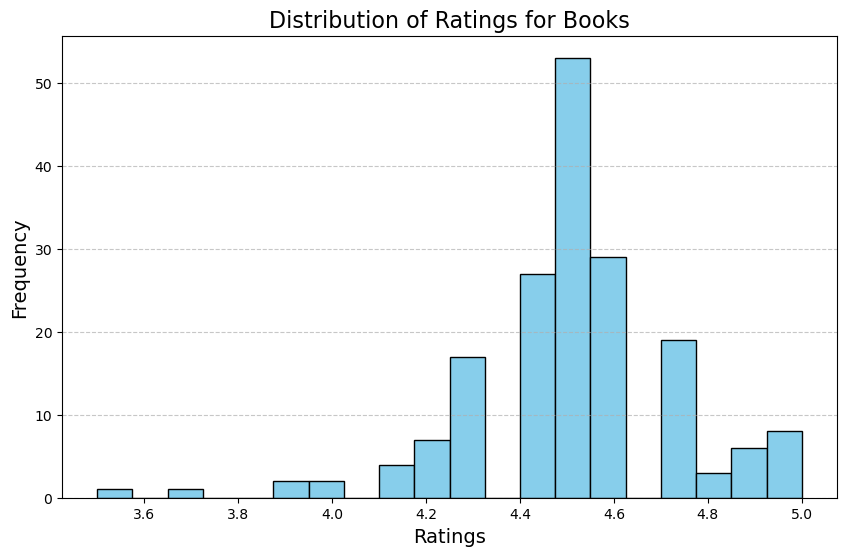

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(df['Average Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings for Books', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**49. Draw a line plot to show average price for each rating level**

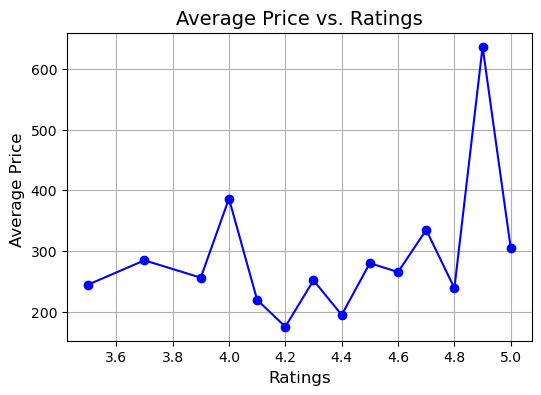

In [111]:
price_vs_rating = df[['Price', 'Average Rating']].groupby('Average Rating').mean()
plt.figure(figsize=(6, 4))
plt.plot(price_vs_rating.index, price_vs_rating['Price'], marker='o', color='blue')
plt.title('Average Price vs. Ratings', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Average Price ', fontsize=12)
plt.grid(True)
plt.show()


# Educational Website 

In [113]:
# Read all CSV files into DataFrames
users_df = pd.read_csv("users.csv",parse_dates=['date_of_birth','registration_date'], dayfirst=True)
courses_df = pd.read_csv("courses.csv",parse_dates=['created_on','last_updated_on'], dayfirst=True)
ratings_df = pd.read_csv("ratings.csv",parse_dates=['first_reviewed_on','last_updated_on'], dayfirst=True)
enrollments_df = pd.read_csv("enrollments.csv",parse_dates=['enrollment_date'], dayfirst=True)
payments_df = pd.read_csv("payments.csv",parse_dates=['transaction_date'], dayfirst=True)
refunds_df = pd.read_csv("refunds.csv",parse_dates=['refund_date'], dayfirst=True)

In [114]:
print("Users DataFrame columns:", users_df.columns.tolist(), "\n")
print("Courses DataFrame columns:", courses_df.columns.tolist(), "\n")
print("Ratings DataFrame columns:", ratings_df.columns.tolist(), "\n")
print("Enrollments DataFrame columns:", enrollments_df.columns.tolist(), "\n")
print("Payments DataFrame columns:", payments_df.columns.tolist(), "\n")
print("Refunds DataFrame columns:", refunds_df.columns.tolist(), "\n")

Users DataFrame columns: ['user_id', 'name', 'date_of_birth', 'email', 'gender', 'category', 'registration_date', 'country', 'last_login_date', 'user_type'] 

Courses DataFrame columns: ['course_id', 'title', 'category', 'language', 'subtitles', 'price', 'instructor_id', 'length', 'difficulty_level', 'created_on', 'last_updated_on', 'number_of_videos', 'number_of_quizzes', 'view_count', 'average_watch_duration', 'certification_available', 'completion_rate', 'bookmark_count'] 

Ratings DataFrame columns: ['review_id', 'course_id', 'student_id', 'rating', 'review_text', 'first_reviewed_on', 'last_updated_on', 'helpful_count', 'reported_count'] 

Enrollments DataFrame columns: ['enrollment_id', 'student_id', 'course_id', 'enrollment_date'] 

Payments DataFrame columns: ['payment_id', 'enrollment_id', 'discount_percent', 'amount_paid', 'coupon_code', 'payment_method', 'transaction_date', 'transaction_id', 'payment_status'] 

Refunds DataFrame columns: ['refund_id', 'enrollment_id', 'refund

**50. How many courses are free and how many courses have a price associated with them?**


*Use the apply() function to categorize courses into "Free" and "Paid" based on the price column. 
Then  use  value_counts() to get a count of how many courses fall into each category.*

In [117]:
courses_df['price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()

price
Paid    45
Free    18
Name: count, dtype: int64

**51. How many courses is each instructor teaching on the platform?**

*Use groupby() on the instructor_id column to group the courses based on each instructor. Use the .size() function to count the number of courses for each instructor. Merge the resulting dataset with the users table to get instructor names*

In [120]:
df = courses_df.groupby('instructor_id').size().reset_index(name='course_count')
pd.merge(users_df, df, left_on='user_id', right_on='instructor_id')[['name', 'course_count']]

,name,course_count
0,Marvin Garcia,3
1,Mr. Scott Logan,2
2,John Armstrong,1
3,Justin Smith,1
4,Mrs. Kimberly Parrish,2
5,Jodi Cunningham,2
6,Anthony Robinson,2
7,Linda Camacho,4
8,Eugene Martinez,1
9,Susan Smith,2


**52. Which courses are the most popular based on the number of bookmarks?**

*Select the title and bookmark_count columns from courses_df, and then use nlargest()*

In [123]:
courses_df[['title', 'bookmark_count']].nlargest(5, 'bookmark_count')

,title,bookmark_count
34,Genetics: From DNA to Evolution,485
13,Python Masterclass,476
24,Physics Made Simple: Fundamentals to Advanced,458
11,Instructional Design for Online Learning,452
15,Leadership and Strategic Management,450


**53. How many users are registered in each user category (e.g., Working, Student, Homemaker, Retired)?**

*Use the value_counts() function on the category column of the users_df DataFrame.*

In [126]:
users_df['category'].value_counts()

category
retired      766
homemaker    744
student      717
working      715
Name: count, dtype: int64

**54. What is the male-to-female ratio among the users?**

*Use the value_counts() function on the gender column of the users_df DataFrame to count the number of male and female users. Then, calculate the ratio of males to females by dividing the count of male users by the count of female users.*

In [129]:
gender_count = users_df['gender'].value_counts()
ratio = gender_count['male'] / gender_count['female']
print(f'Male to female ratio is {ratio:.2f}')

Male to female ratio is 1.52


**55. Which courses have the worst completion rates?**


*Select the title and completion_rate columns from the courses_df DataFrame and display the top 3 courses.*

In [132]:
courses_df[['title', 'completion_rate']].nsmallest(3, 'completion_rate')

,title,completion_rate
27,Biology: Understanding the Human Body,12.52
7,Introduction to Quantum Physics,12.88
17,Project Management: From Initiation to Execution,13.52


**56. What is the most common rating given by students?**

*Use mode() on the rating column in the ratings_df DataFrame. mode() returns a Series, which can contain multiple values if there are ties. Use [0] to ensure you get the first mode in case of multiple modes.*

In [135]:
ratings_df['rating'].mode()[0]

5

**57. How many unique users are enrolled in at least one course?**

*Use the nunique() function on the student_id column in the enrollments_df DataFrame. This will count the unique users who have at least one enrollment record.*

In [138]:
enrollments_df['student_id'].nunique()

261

**58. How many users are enrolled in multiple courses?**

*Use value_counts() to count how many times each student_id appears in the enrollments_df DataFrame.  In the resulting series, filter users who are enrolled in more than one course and get the number of such users using len().*

In [141]:
user_course_counts = enrollments_df['student_id'].value_counts()
len(user_course_counts[user_course_counts > 1])

14

**59. Which 5 courses have the most enrollments?**

*Uses the value_counts() function on the course_id column of the enrollments_df DataFrame. This counts how many times each course_id appears, indicating the number of enrollments for each course. The result is a series that is then converted to a DataFrame using reset_index(name='enrollment_count') to make the enrollment counts a regular column.*

*The enrollment_counts DataFrame is merged with the courses_df DataFrame to add the corresponding course title based on the course_id. This step associates each course's enrollment count with its name.*

*Use nlargest to get the top 5 courses with the highest enrollment count*


In [144]:
enrollment_counts = enrollments_df['course_id'].value_counts().reset_index(name='enrollment_count')
enrollment_with_names = pd.merge(enrollment_counts, courses_df[['course_id', 'title']], on='course_id', how='inner')

enrollment_with_names.nlargest(5, 'enrollment_count')

,course_id,enrollment_count,title
0,76064,20,Leadership and Strategic Management
1,64796,19,First Aid and CPR Certification
2,92956,18,Project Management: From Initiation to Execution
3,79177,18,Financial Analysis for Decision-Making
4,13258,15,Instructional Design for Online Learning


**60. Find the total revenue generated from successful payments.**

*Filter the successful payments in the payments table and then calculate the total revenue by summing the amount_paid column.*

In [147]:
payments_df[payments_df['payment_status'] == 'success']['amount_paid'].sum()

3770.5

**61. What is the average discount percentage applied across all discounted payments?**

*Filter payments where a discount was applied (discount_percent > 0) and the calculate the average discount percentage for these discounted payments using mean()*

In [150]:
payments_df[payments_df['discount_percent'] > 0]['discount_percent'].mean()

16.35135135135135

**62. Find top 3 countries with the highest number of students**

*Filter users_df  by user_type to include only the students, count occurrences of each country  using value_counts() and use .head(3) to retrieve the top 3 countries with the highest number of students.*

In [153]:
users_df[users_df['user_type'] == 'student']['country'].value_counts().head(3)

country
India    1148
US        850
China     524
Name: count, dtype: int64

**63. What is the most common reasons for refunds?**

In [155]:
refunds_df['refund_reason'].value_counts().idxmax()

'Course content not satisfactory'

**64. Add an age column to the users table and then calculate average age of the students on the website**

*Add an age column to the users_df dataframe. Filter the users_df DataFrame to include only rows where the user_type is "student, compute the mean of the age column to find the average age of students.*

In [158]:
users_df['age'] = (pd.to_datetime('today') - users_df['date_of_birth']).dt.days // 365
users_df[users_df['user_type'] == 'student']['age'].mean()

41.67263955892488

**65. Find average age of the students in each course**

*Merge enrollments with users to get age for each student enrolled*\
*Group by course_id and get average age  for each course_id*\
*Merge with courses_df to get the course titles*

In [161]:
df = pd.merge(enrollments_df, users_df[['user_id', 'age']], left_on='student_id', right_on='user_id')
df = df.groupby('course_id')['age'].mean().reset_index(name='average age')
pd.merge(df, courses_df[['course_id', 'title']], on='course_id')

,course_id,average age,title
0,13258,41.666667,Instructional Design for Online Learning
1,18426,39.769231,Creative Writing: Crafting Compelling Stories
2,20195,51.000000,Advanced Data structures through C#
3,21108,37.785714,Teaching Strategies for the 21st Century
4,21248,38.500000,Full-Stack Web Development Bootcamp
5,22005,69.000000,Nutrition and Healthy Living
6,27385,46.500000,Mastering React: Advanced Concepts
7,27431,15.500000,Biology: Understanding the Human Body
8,30371,41.733333,Introduction to Quantum Physics
9,30790,47.000000,Introduction to Animation and Motion Graphics


**66. Find average age of the students in each course category**

*Merge enrollments with users to get the age for each enrolled student*\
*Merge with courses to get the course category*\
*Calculate the average age for each course category by grouping on category and find mean of age.*

In [164]:
merged_df = pd.merge(enrollments_df, users_df[['user_id', 'age']], left_on='student_id', right_on='user_id')
merged_df = pd.merge(merged_df, courses_df[['course_id', 'category']], on='course_id')
merged_df.groupby('category')['age'].mean().reset_index()

,category,age
0,Arts and Design,43.550000
1,Business and Management,42.671875
2,Education,39.450704
3,Health,43.028571
4,Personal Development,65.000000
5,Science and Mathematics,39.837209
6,Technology and Programming,41.404762


**67. Calculate the average age of users for each user category (e.g., Working, Student, Homemaker, Retired)**


*Group by 'category' and calculate the average age*

In [167]:
users_df.groupby('category')['age'].mean().reset_index(name = 'Average_Age')

,category,Average_Age
0,homemaker,41.931452
1,retired,41.663185
2,student,41.146444
3,working,42.037762


**68. Plot the age distribution of all the users**

*Show the distribution of user ages with a histogram and KDE (Kernel Density Estimate) curve.*


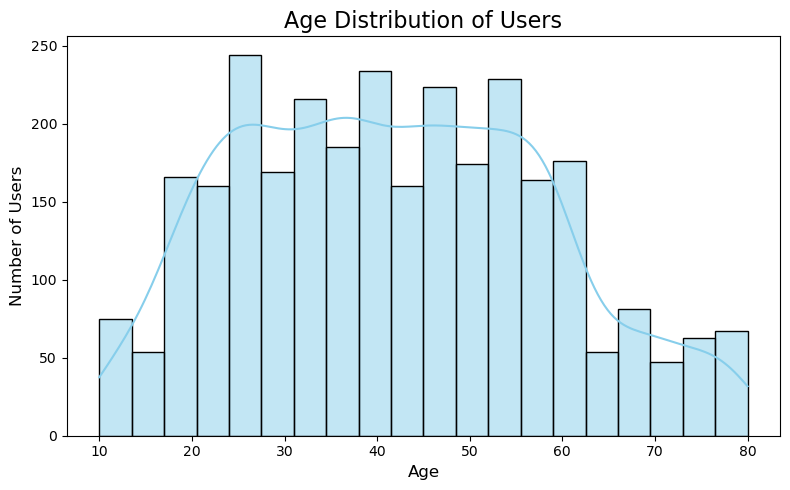

In [170]:
plt.figure(figsize=(8, 5))
sns.histplot(users_df['age'], bins=20, kde=True, color='skyblue')

plt.title('Age Distribution of Users', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()
plt.show()


**69. Plot the gender distribution to understand the gender breakdown of users**

*Count the number of users by gender, and generate a bar chart showing the number of male and female users.*

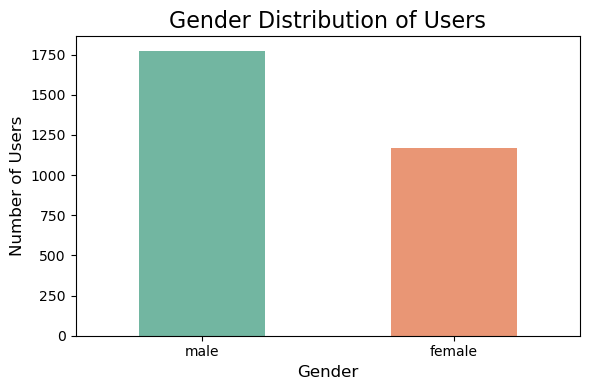

In [173]:
gender_distribution = users_df['gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, hue=gender_distribution.index, palette='Set2', legend=False, width=0.5)
plt.title('Gender Distribution of Users', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()
plt.show()


**70. Plot the geographic distribution of users (based on country)**

*Count the number of users in each country, generate a bar chart showing the top 10 countries with the highest number of users.*

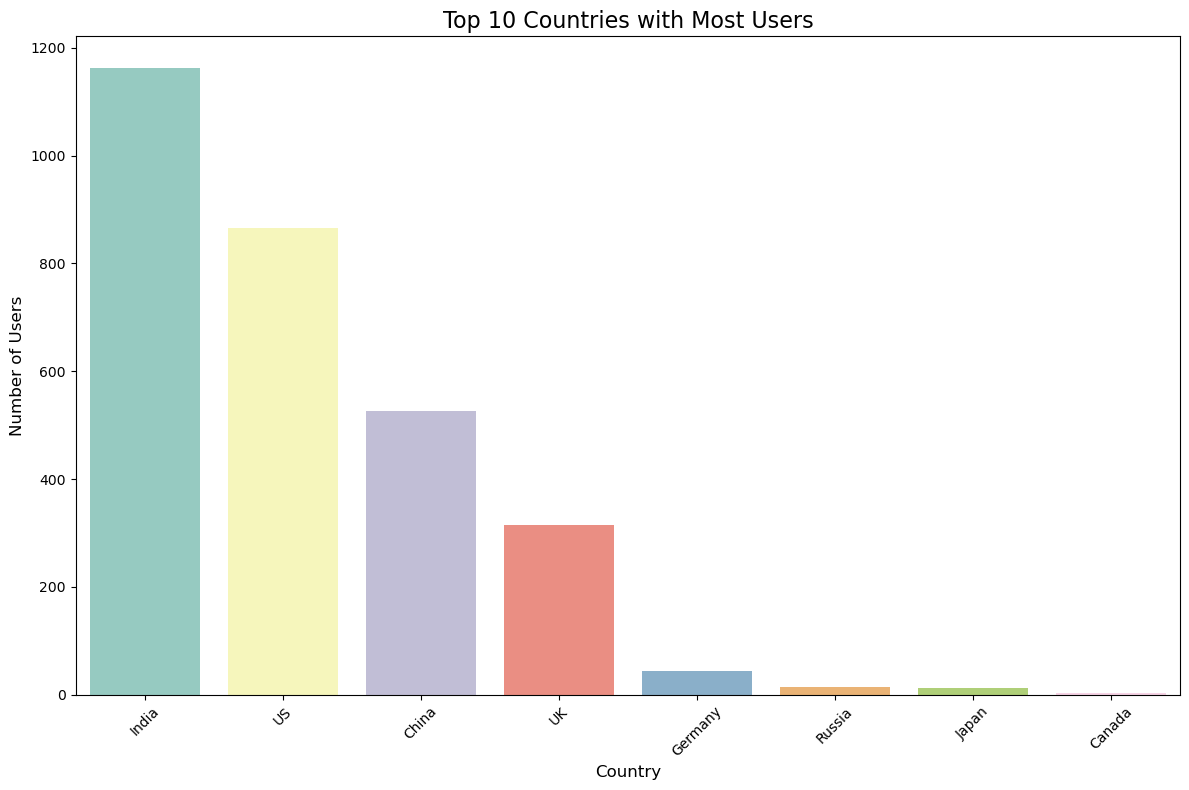

In [176]:
# Count the number of users by country
location_distribution = users_df['country'].value_counts().head(10)  # Top 10 countries

# Plot the location distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=location_distribution.index, y=location_distribution.values, hue=location_distribution.index, palette='Set3', legend=False)

# Customize the plot
plt.title('Top 10 Countries with Most Users', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**71. Show how the age distribution varies for different user types.**

*To explore the relationship between user age and their type (e.g., instructor, student, admin), we can create a boxplot.*

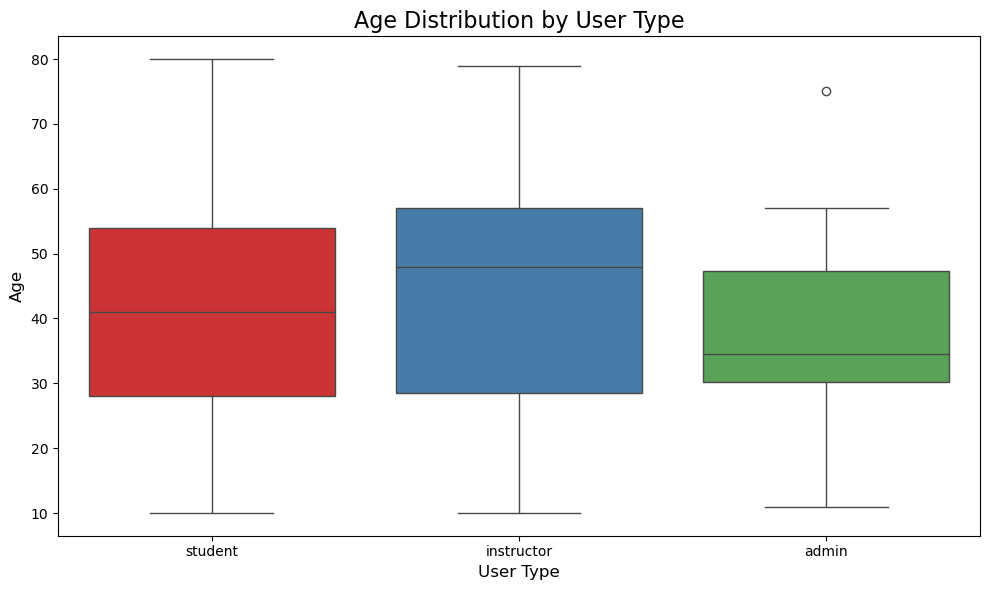

In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='age', hue='user_type', data=users_df, palette='Set1', legend=False)

plt.title('Age Distribution by User Type', fontsize=16)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()

plt.show()


**72. Find the top 5 most popular courses based on view counts**

*Sort the courses by the view_count column in descending order and select the top 5.*

In [182]:
courses_df[['course_id', 'title', 'category', 'view_count']].nlargest(5, 'view_count')

,course_id,title,category,view_count
29,21248,Full-Stack Web Development Bootcamp,Technology and Programming,9989
27,27431,Biology: Understanding the Human Body,Science and Mathematics,9821
35,27385,Mastering React: Advanced Concepts,Technology and Programming,9445
33,74770,Marine Biology: Life Under the Sea,Science and Mathematics,9320
34,86558,Genetics: From DNA to Evolution,Science and Mathematics,9230


**73. Find the top 2 popular courses in each category based on view_count**

*Sort courses by view_count within each category, Group by category and get top 2 courses in each category* 

In [185]:
sorted_courses = courses_df.sort_values(by=['category', 'view_count'], ascending=[True, False])
sorted_courses[['category', 'title', 'view_count']].groupby('category').head(2)


,category,title,view_count
20,Arts and Design,UX/UI Design Fundamentals,6196
19,Arts and Design,Graphic Design Essentials: Tools and Techniques,6117
17,Business and Management,Project Management: From Initiation to Execution,6857
16,Business and Management,Financial Analysis for Decision-Making,4575
12,Education,Early Childhood Education Fundamentals,8285
62,Education,Childhood Education Fundamentals,7785
3,Health,First Aid and CPR Certification,8483
51,Health,Introduction to Medical Terminology,6379
38,Personal Development,Public Speaking and Communication Mastery,8970
40,Personal Development,The Art of Negotiation and Persuasion,7953


**74. What is the average course duration per category.**

*Convert 'length' from 'hours:minutes' to total minutes, add a new column 'total_minutes'. \
Calculate the average total minutes per category.\
Convert the average duration back to hours and minutes format.\
Drop the intermediate 'total_minutes' column.*

In [188]:
courses_df['total_minutes'] = courses_df['length'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df = courses_df.groupby('category')['total_minutes'].mean().reset_index()
df['average_duration'] = (df['total_minutes'] // 60).astype(int).astype(str) + ' hours ' + (df['total_minutes'] % 60).astype(int).astype(str) + ' minutes'
df = df.drop(columns=['total_minutes'])
df

,category,average_duration
0,Arts and Design,8 hours 1 minutes
1,Business and Management,6 hours 57 minutes
2,Education,8 hours 19 minutes
3,Health,11 hours 57 minutes
4,Personal Development,10 hours 4 minutes
5,Science and Mathematics,11 hours 33 minutes
6,Technology and Programming,12 hours 29 minutes


**75. Find the top 5 highest revenue generating courses**

*Merge enrollments and payments using 'enrollment_id'\
Filter for successful payments\
Merge with courses to include course titles\
Calculate total revenue for each course by grouping on title and calculate sum for amount_paid\
Find the top 5 courses with the highest revenue*

In [191]:
merged_data = pd.merge(enrollments_df, payments_df, on='enrollment_id', how='inner')
successful_payments = merged_data[merged_data['payment_status'] == 'success']
revenue_data = pd.merge(successful_payments, courses_df[['course_id', 'title']], on='course_id', how='inner')
course_revenue = revenue_data.groupby('title')['amount_paid'].sum().reset_index()
course_revenue.nlargest(5, 'amount_paid')

,title,amount_paid
18,Photography: From Beginner to Pro,345.80
22,Special Education: Understanding Disabilities,335.80
2,Advanced Data structures through C++,295.25
9,Full-Stack Web Development Bootcamp,278.00
21,Renewable Energy: Technologies and Applications,249.00


**76. What is the average transaction amount for each payment method.**

*Filter only successful payments and group by payment_method and calculate the average amount_paid*

In [194]:
successful_payments = payments_df[payments_df['payment_status'] == 'success']
successful_payments.groupby('payment_method')['amount_paid'].mean().reset_index(name ='Average Transaction Amount')

,payment_method,Average Transaction Amount
0,PayPal,78.692857
1,UPI,87.491667
2,card,99.450000


**77. Calulate the average rating for each course and add a column average_rating in courses_df**

*Calculate the average rating for each course.*
*Use map to add the average_rating to courses_df based on course_id*. 
*Display the updated courses_df*

In [197]:
average_ratings = ratings_df.groupby('course_id')['rating'].mean()
courses_df['average_rating'] = courses_df['course_id'].map(average_ratings)
courses_df.head()

,course_id,title,category,language,subtitles,price,instructor_id,length,difficulty_level,created_on,last_updated_on,number_of_videos,number_of_quizzes,view_count,average_watch_duration,certification_available,completion_rate,bookmark_count,total_minutes,average_rating
0,54145,Data structures through C++,Technology and Programming,English,no,0,668495,10:16,Beginner,2020-11-18,2025-01-09,28,9,514,00:41,yes,43.71,188,616,4.000000
1,45770,Advanced Mathematics for Engineers,Science and Mathematics,English,yes,0,767050,20:28,Intermediate,2020-10-04,2025-01-07,23,8,7570,08:12,no,46.27,83,1228,NaN
2,33057,Advanced Data structures through Python,Technology and Programming,Hindi,yes,0,220585,11:35,Intermediate,2021-11-16,2025-01-14,57,4,5265,12:35,yes,44.74,165,695,4.375000
3,64796,First Aid and CPR Certification,Health,English,yes,0,871007,10:20,Advanced,2020-08-24,2025-01-08,82,1,8483,01:46,no,20.55,32,620,4.000000
4,51293,Managing Diabetes and Chronic Diseases,Health,English,yes,0,278667,08:05,Intermediate,2020-03-07,2025-01-15,55,10,1429,13:21,no,49.40,279,485,3.428571


**78. Find 2 top rated courses in each course category**

*Sort the courses by category and average_rating (descending order). Group by category and take the top 2 courses for each category. Display the result*

In [200]:
courses_df_sorted = courses_df.sort_values(by=['category', 'average_rating'], ascending=[True, False])
top_courses = courses_df_sorted.groupby('category').head(2).reset_index()
top_courses[['category', 'course_id', 'title', 'average_rating']]

,category,course_id,title,average_rating
0,Arts and Design,64561,Photography: From Beginner to Pro,5.000000
1,Arts and Design,85886,Graphic Design Essentials: Tools and Techniques,4.666667
2,Business and Management,53452,Entrepreneurship 101: Building Your First Startup,5.000000
3,Business and Management,79177,Financial Analysis for Decision-Making,4.333333
4,Education,23531,Childhood Education Fundamentals,4.800000
5,Education,97039,Early Childhood Education Fundamentals,4.500000
6,Health,20671,Anatomy and Physiology: Understanding the Huma...,5.000000
7,Health,69513,Introduction to Medical Terminology,4.500000
8,Personal Development,99133,The Art of Negotiation and Persuasion,4.500000
9,Personal Development,57353,Public Speaking and Communication Mastery,4.000000


**79. Display the average rating of each course category**

In [202]:
courses_df.groupby('category')['average_rating'].mean().reset_index()

,category,average_rating
0,Arts and Design,4.426667
1,Business and Management,4.276667
2,Education,4.015152
3,Health,4.191005
4,Personal Development,3.533333
5,Science and Mathematics,3.951667
6,Technology and Programming,4.025680


**80. Calculate the average rating for each instructor.**


*Group the courses_df by 'instructor_id' and calculate the mean 'average_rating' for each instructor*\
*Merge the resulting DataFrame with the users_df to get the names of instructors*


In [205]:
df = courses_df.groupby('instructor_id')['average_rating'].mean().reset_index()
pd.merge(df, users_df[['user_id','name']], left_on = 'instructor_id', right_on = 'user_id', how='inner')

,instructor_id,average_rating,user_id,name
0,173468,3.250000,173468,Mrs. Kimberly Parrish
1,204568,4.083333,204568,Michael Johnson
2,220585,4.296905,220585,Valerie Hernandez
3,241479,4.125000,241479,Charles Sanchez
4,278667,3.587302,278667,Michael Flores
5,288315,3.750000,288315,Mr. Scott Logan
6,295438,4.000000,295438,Justin Smith
7,364202,4.333333,364202,John Taylor
8,370558,4.500000,370558,John Armstrong
9,417012,3.800000,417012,Eugene Martinez


**81. Display courses with no ratings**

*Find courses with NaN average rating*

In [208]:
courses_df[courses_df['average_rating'].isna()][['course_id', 'title', 'average_rating']]

,course_id,title,average_rating
1,45770,Advanced Mathematics for Engineers,NaN
24,64745,Physics Made Simple: Fundamentals to Advanced,NaN
28,58566,Introduction to Astrophysics,NaN
44,33454,Mental Health Awareness and Support,NaN


**82. Find courses that have no students enrolled in them**

*Identify courses with enrollments by using unique() on 'course_id' column in enrollments_df\
Find courses with no enrollments by using ~ operator and isin()*

In [211]:
enrolled_courses = enrollments_df['course_id'].unique()
courses_df[~courses_df['course_id'].isin(enrolled_courses)][['course_id', 'title']] 

,course_id,title
18,53452,Entrepreneurship 101: Building Your First Startup
21,45749,Python for Data Science and Machine Learning
24,64745,Physics Made Simple: Fundamentals to Advanced
25,51452,Data structures through C
28,58566,Introduction to Astrophysics
30,12938,Climate Change: Science and Solutions
31,77946,Biotechnology: Applications and Impact
33,74770,Marine Biology: Life Under the Sea
37,68511,Mindfulness and Stress Management
38,57353,Public Speaking and Communication Mastery


**83. Find the number of students from each country based on their enrollments.**


In [213]:
df = pd.merge(enrollments_df, users_df, left_on = 'student_id', right_on = 'user_id', how = 'inner')
df.groupby('country').size()

country
China       59
Germany      6
India      100
UK          37
US          75
dtype: int64

**84. Get the course popularity details by country i.e. find the course with the highest number of students in each country.**

*Merge enrollments_df with users_df to get country information\
Group by country and course_id to count the number of students enrolled in each course in each country\
For each country, find the course with the highest number of students\
Merge with courses_df to get the course titles*

In [216]:
df = pd.merge(enrollments_df, users_df, left_on = 'student_id', right_on = 'user_id', how = 'inner')
df = df.groupby(['country', 'course_id']).size().reset_index(name='student_count')
df = df.loc[df.groupby('country')['student_count'].idxmax()]
pd.merge(df, courses_df[['course_id', 'title']], on='course_id', how='left')

,country,course_id,student_count,title
0,China,49963,5,How to Teach Reading and Writing Effectively
1,Germany,27385,1,Mastering React: Advanced Concepts
2,India,93619,9,Environmental Science: Understanding Ecosystems
3,UK,64796,5,First Aid and CPR Certification
4,US,64796,8,First Aid and CPR Certification


**85. Find the top 5 bestselling paid courses**

*Filter the successful payments\
Merge with enrollments_df to get the corresponding course_ids\
Calculate the total revenue for each course\
merge with courses_df to get course titles\
Get the top-selling courses using nlargest*

In [219]:
df = payments_df[payments_df['payment_status']=='success']
df = pd.merge(df, enrollments_df, on = 'enrollment_id')
df = df.groupby('course_id')['amount_paid'].sum().reset_index(name='total_revenue')
df = pd.merge(df, courses_df[['course_id','title']], on = 'course_id')
df.nlargest(5,'total_revenue')

,course_id,total_revenue,title
15,64561,345.80,Photography: From Beginner to Pro
18,78724,335.80,Special Education: Understanding Disabilities
10,56446,295.25,Advanced Data structures through C++
1,21248,278.00,Full-Stack Web Development Bootcamp
14,62660,249.00,Renewable Energy: Technologies and Applications


**86. Find the bestselling course in each category**

*Filter successful payments\
Merge payments with enrollments to get course_ids\
Merge with courses to get category info for each course\
Group by category and course, and calculate total revenue (sum of amount_paid)\
For each category, find the course with the highest revenue*

In [222]:
df = payments_df[payments_df['payment_status']=='success']
df = pd.merge(df, enrollments_df, on = 'enrollment_id', how = 'inner')
df = pd.merge(df, courses_df[['course_id','title', 'category']], on = 'course_id', how = 'left')
df = df.groupby(['category','course_id', 'title'])['amount_paid'].sum().reset_index(name='total_revenue') 
df = df.loc[df.groupby('category')['total_revenue'].idxmax()]
df

,category,course_id,title,total_revenue
2,Arts and Design,64561,Photography: From Beginner to Pro,345.80
5,Education,78724,Special Education: Understanding Disabilities,335.80
12,Health,96323,Global Health and Epidemiology,173.70
14,Personal Development,99133,The Art of Negotiation and Persuasion,99.00
17,Science and Mathematics,62660,Renewable Energy: Technologies and Applications,249.00
24,Technology and Programming,56446,Advanced Data structures through C++,295.25


**87. Calculate the number of free enrollments and paid enrollments**

*Merge enrollments with courses to include the price information*\
*Count free enrollments (price == 0) and  paid enrollments (price > 0)*

In [225]:
enrolled_courses = enrollments_df.merge(courses_df, on='course_id', how='inner')
free_enrollments_count = (enrolled_courses['price'] == 0).sum()
paid_enrollments_count = (enrolled_courses['price'] > 0).sum()
print("Number of free enrollments:", free_enrollments_count)
print("Number of paid enrollments:", paid_enrollments_count)

Number of free enrollments: 234
Number of paid enrollments: 43


**88. Find correlation between the number of videos and the completion_rate.**

In [227]:
courses_df[['number_of_videos', 'completion_rate']].corr()

,number_of_videos,completion_rate
number_of_videos,1.000000,-0.066153
completion_rate,-0.066153,1.000000


**89. Find the correlation between number of Quizzes and average rating for each course**

In [229]:
average_ratings = ratings_df.groupby('course_id')['rating'].mean()
courses_df['average_rating'] = courses_df['course_id'].map(average_ratings)
courses_df[['number_of_quizzes', 'average_rating']].corr()

,number_of_quizzes,average_rating
number_of_quizzes,1.000000,-0.213086
average_rating,-0.213086,1.000000


**90. How many payment transactions failed using paypal**

*Filter payments_df and get the number of rows*

In [232]:
payments_df[ (payments_df['payment_method']=='PayPal') & (payments_df['payment_status']== 'failed')].shape[0]

1

**91. Get a summary of payment methods, including how many successful, failed or pending payments are there for each method.**

*Group the data by payment method and payment status*

In [235]:
payments_df.groupby(['payment_method', 'payment_status']).size().reset_index(name='count')

,payment_method,payment_status,count
0,PayPal,failed,1
1,PayPal,success,14
2,UPI,pending,1
3,UPI,success,18
4,card,success,11


**92. Display the courses that were never refunded**

In [237]:
refunded_courses = enrollments_df[enrollments_df['enrollment_id'].isin(refunds_df['enrollment_id'])]['course_id'].unique()
never_refunded_courses = courses_df[~courses_df['course_id'].isin(refunded_courses)]
never_refunded_courses[['course_id', 'title', 'category']]

,course_id,title,category
0,54145,Data structures through C++,Technology and Programming
1,45770,Advanced Mathematics for Engineers,Science and Mathematics
2,33057,Advanced Data structures through Python,Technology and Programming
7,30371,Introduction to Quantum Physics,Science and Mathematics
9,21108,Teaching Strategies for the 21st Century,Education
10,97988,Classroom Management: Techniques for Success,Education
11,13258,Instructional Design for Online Learning,Education
12,97039,Early Childhood Education Fundamentals,Education
17,92956,Project Management: From Initiation to Execution,Business and Management
18,53452,Entrepreneurship 101: Building Your First Startup,Business and Management


**93. Use box plot to plot distribution of completion rates by difficulty level.**

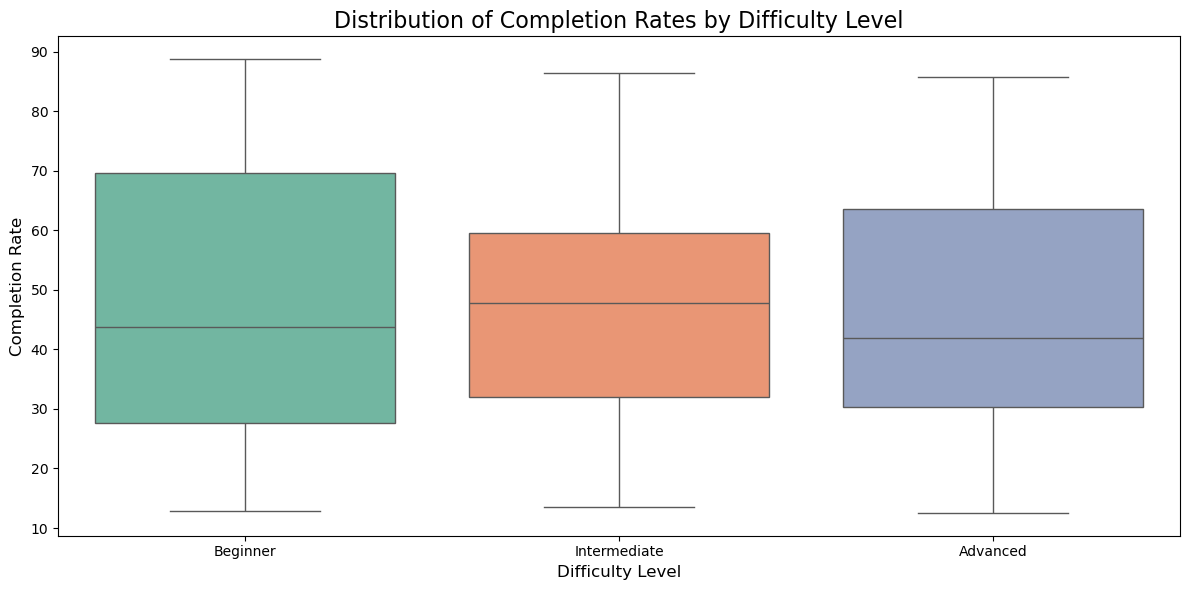

In [239]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='difficulty_level', y='completion_rate', data=courses_df, palette='Set2', hue='difficulty_level')
plt.title('Distribution of Completion Rates by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Completion Rate', fontsize=12)
plt.tight_layout()
plt.show()

**94. Identify the course category with the most enrollments**

*Merge enrollments_df with courses_df to bring the category information*\
*Count the number of enrollments for each category*\
*Find the most popular category*

In [242]:
df = pd.merge(enrollments_df, courses_df[['course_id', 'category']], on='course_id', how='inner')
df = df.groupby('category')['enrollment_id'].nunique().reset_index(name='enrollment_count')
df.nlargest(1,'enrollment_count')

,category,enrollment_count
2,Education,71


**95. Find the number of inactive users - users who have not logged in during the last 30 days.**

*Define the cutoff date (30 days ago from today)\
Filter users who have not logged in within the last 30 days\
Count the rows*

In [245]:
users_df['last_login_date'] = pd.to_datetime(users_df['last_login_date'], dayfirst=True)
cutoff_date = datetime.now() - timedelta(days=30)
users_df[users_df['last_login_date'] < cutoff_date].shape[0]

1155

**96. What is the average price of courses in each category? (exclude the free courses)**

*Filter the free courses, Calculate the average price of paid courses grouped by category*

In [248]:
paid_courses = courses_df[courses_df['price'] > 0]
paid_courses.groupby('category')['price'].mean()

category
Arts and Design                71.000000
Business and Management        81.000000
Education                      94.000000
Health                         93.000000
Personal Development           90.800000
Science and Mathematics       124.900000
Technology and Programming    116.727273
Name: price, dtype: float64

**97. How many courses are available with subtitles?**

In [250]:
courses_df[courses_df['subtitles']=='yes'].shape[0]

55

**98. What percentage of courses offer certifications?**

*Count the number of courses that offer certifications*

In [253]:
courses_with_certification = courses_df[courses_df['certification_available'] == 'yes']
(len(courses_with_certification) / len(courses_df)) * 100

66.66666666666666

**99. What is the average time gap between a user's registration date and their first enrollment date?**

*Get the first enrollment date for each user by merging with the enrollments_df*\
*Merge the registration dates with the first enrollment dates*\
*Calculate the time gap between registration and first enrollment in days*\
*Calculate the average time gap*

In [256]:
first_enrollment_dates = enrollments_df.groupby('student_id')['enrollment_date'].min()
user_registration_enrollment = pd.merge(users_df[['user_id', 'registration_date']], first_enrollment_dates, 
                                         left_on='user_id', right_index=True, how='inner')
user_registration_enrollment['time_gap'] = (user_registration_enrollment['enrollment_date'] - user_registration_enrollment['registration_date']).dt.days
user_registration_enrollment['time_gap'].mean()

933.6628352490421

**100. Get the email addresses and names of users who have signed up but have not enrolled in any course.**

*Identify users who have enrolled in any course and then in users_df filter users who have not enrolled in any course using isin()*

In [259]:
enrolled_users = enrollments_df['student_id'].unique()
users_df[~users_df['user_id'].isin(enrolled_users)][['email', 'name']]

,email,name
0,garzaanthony@robinson.org,Allison Hill
1,lindsay78@gmail.com,George Davis
2,jacqueline19@jackson.biz,Mark Diaz
3,julie69@cox-osborn.com,Thomas Ellis
4,cartereric@gmail.com,Alexandra Le
...,...,...
2937,williamhill@gmail.com,Stacy Russell
2938,rebeccahunt@yahoo.com,Tammy Marsh DDS
2939,andrew73@rodriguez.org,Kevin Floyd
2940,hjohnston@shields-sanchez.net,Nancy Galloway


**101. Find the customers who are refunding without any reason**

*Use refunds_df to filter rows where refund_reason is null (NaN).*
*Join with enrollments_df to get the student_id for each refund.*
*Group by student_id and count the number of refunds.*
*Sort the results to find the users with the highest refund count.*
*Merge with users_df to get the student names.*

In [262]:
refunds_without_reason = refunds_df[refunds_df['refund_reason'].isna()]
refunds_with_students = pd.merge(refunds_without_reason, enrollments_df, on='enrollment_id', how='left')
refund_counts = refunds_with_students.groupby('student_id').size().reset_index(name='refund_count')
refunders = refund_counts.sort_values(by='refund_count', ascending=False)
refunders_with_name = pd.merge(refunders, users_df[['user_id', 'name']], left_on='student_id', right_on='user_id', how='left')
refunders_with_name[['student_id', 'name', 'refund_count']]

,student_id,name,refund_count
0,170176,Theresa Luna,1
1,250029,Brianna Brown,1
2,617435,Tyler Acevedo,1
3,818262,Adam Anderson,1


**102. Analyze monthly new user growth to understand monthly trends**

   year_month  new_users
0     2020-01         59
1     2020-02         41
2     2020-03         46
3     2020-04         46
4     2020-05         50
..        ...        ...
56    2024-09         52
57    2024-10         50
58    2024-11         49
59    2024-12         51
60    2025-01         25

[61 rows x 2 columns]


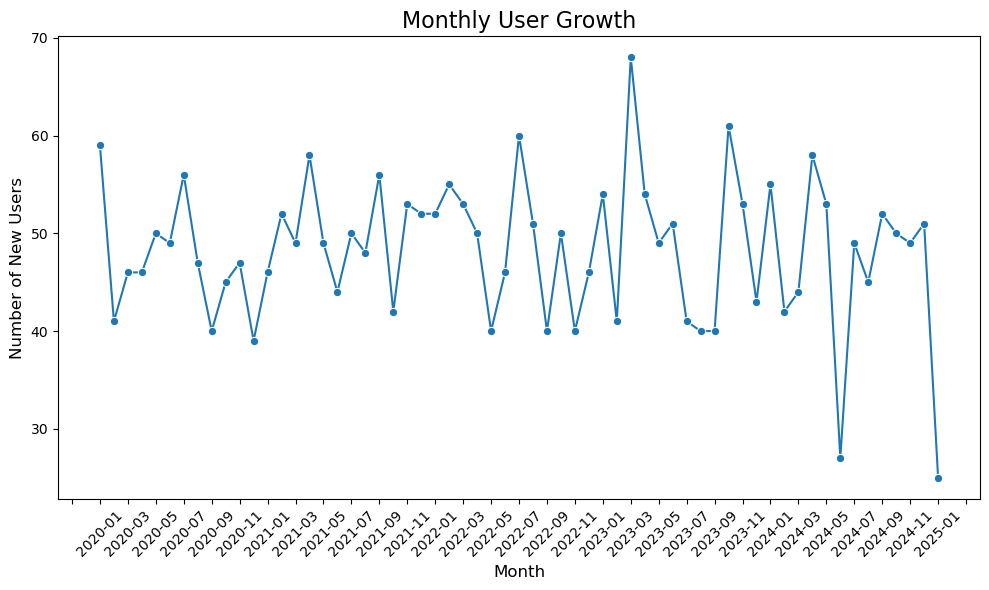

In [264]:
import matplotlib.ticker as ticker
# Extract the year and month from the registration_date
users_df['year_month'] = users_df['registration_date'].dt.to_period('M')

# Count the number of new users each month
monthly_user_growth = users_df.groupby('year_month').size().reset_index(name='new_users')

# Display the monthly user growth report
print(monthly_user_growth)

# Convert 'year_month' to a string to avoid type error
monthly_user_growth['year_month'] = monthly_user_growth['year_month'].astype(str)

# Plot the monthly user growth
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_user_growth, x='year_month', y='new_users', marker='o')

# Customize the plot
plt.title('Monthly User Growth', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of New Users', fontsize=12)
plt.xticks(rotation=45)

# Show ticks at every 2nd value
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Show every 2nd month

plt.tight_layout()

# Show the plot
plt.show()


**103. Calculate and plot the cumulative user growth**

*To calculate and plot cumulative user growth, we can modify the previous code by adding a column to calculate the cumulative sum of new users over time.*

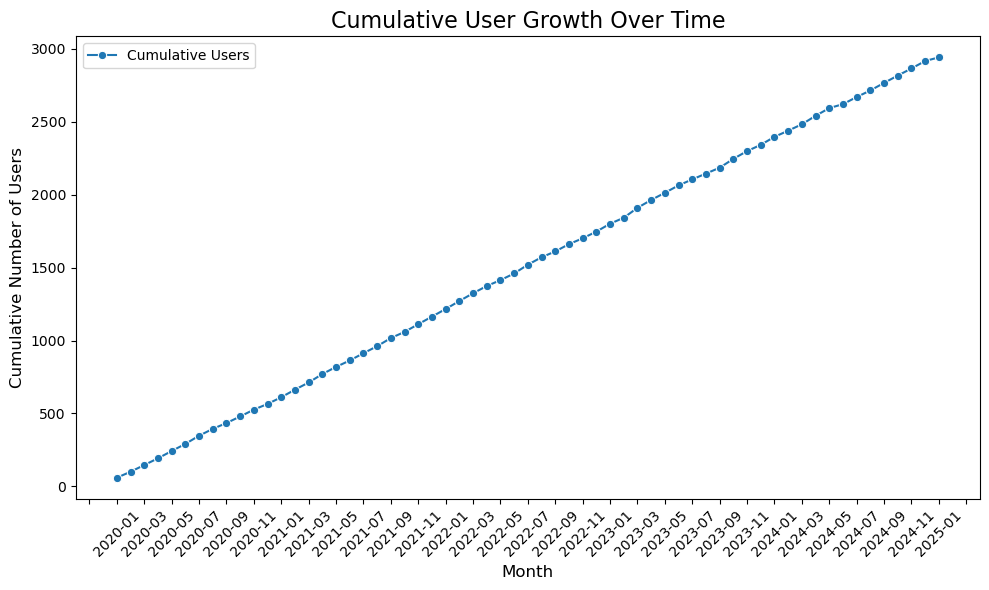

In [267]:
import matplotlib.ticker as ticker

# Extract the year and month from the registration_date
users_df['year_month'] = users_df['registration_date'].dt.to_period('M')

# Count the number of new users each month
monthly_user_growth = users_df.groupby('year_month').size().reset_index(name='new_users')

# Add a cumulative sum column for cumulative user growth
monthly_user_growth['cumulative_users'] = monthly_user_growth['new_users'].cumsum()

# Convert 'year_month' to a string to avoid type error
monthly_user_growth['year_month'] = monthly_user_growth['year_month'].astype(str)

# Plot the cumulative user growth
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_user_growth, x='year_month', y='cumulative_users', marker='o', label='Cumulative Users')

# Customize the plot
plt.title('Cumulative User Growth Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Number of Users', fontsize=12)
plt.xticks(rotation=45)

# Show ticks at every nth value
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Show every 2nd month, for example

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


**104. Generate the monthly revenue report** 

*Extract the year and month from the transaction_date*\
*Calculate the monthly revenue by summing the 'amount_paid' for each month*\
*Drop the temporary 'year_month' column*\
*Display the monthly revenue report*

In [270]:
payments_df['transaction_date'] = pd.to_datetime(payments_df['transaction_date'], dayfirst= True)
payments_df['year_month'] = payments_df['transaction_date'].dt.to_period('M')
monthly_revenue = payments_df.groupby('year_month')['amount_paid'].sum().reset_index()
payments_df = payments_df.drop(columns=['year_month'])
monthly_revenue

,year_month,amount_paid
0,2025-01,4009.0


**105. Generate the annual revenue report** 

In [272]:
# Extract the year from the transaction_date
# Calculate the annual revenue by summing the 'amount_paid' for each year
# Drop the temporary 'year' column
# Display the annual revenue report

payments_df['year'] = payments_df['transaction_date'].dt.year
annual_revenue = payments_df.groupby('year')['amount_paid'].sum().reset_index()
payments_df = payments_df.drop(columns=['year'])
annual_revenue

,year,amount_paid
0,2025,4009.0


**106. Analyze whether there are more purchases on weekdays or weekends**

*Extract the weekday from the transaction_date (0 = Monday, 6 = Sunday).*
*Create a new column to categorize purchases as "Weekday" or "Weekend".*
*Count the number of transactions for weekdays vs weekends*

In [275]:
payments_df['weekday'] = payments_df['transaction_date'].dt.weekday
payments_df['purchase_time'] = payments_df['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
payments_df['purchase_time'].value_counts()

purchase_time
Weekday    30
Weekend    15
Name: count, dtype: int64

**107. Which coupon code is used most frequently?  Visualize the distribution of coupon code usage**

The most frequently used coupon code is: UTUBE23
It was used 10 times.


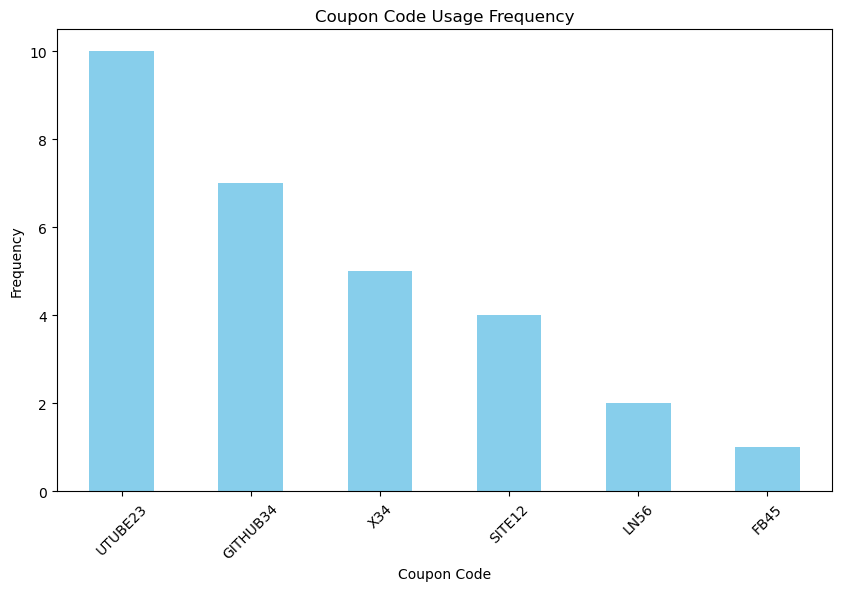

In [277]:
# Count the occurrences of each coupon code
coupon_code_counts = payments_df['coupon_code'].value_counts()

# Get the most frequently used coupon code
most_frequent_coupon_code = coupon_code_counts.idxmax()
most_frequent_coupon_code_count = coupon_code_counts.max()

print(f"The most frequently used coupon code is: {most_frequent_coupon_code}")
print(f"It was used {most_frequent_coupon_code_count} times.")

# Plot the coupon code usage
plt.figure(figsize=(10,6))
coupon_code_counts.plot(kind='bar', color='skyblue')
plt.title('Coupon Code Usage Frequency')
plt.xlabel('Coupon Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()	

**108. Analyze completion rates by country**

*Merge Users and Enrollments*\
*Merge the resulting DataFrame with Courses*\
*Group by Country and Calculate Average Completion Rate*\
*Bar chart for completion rates by country*

Completion Rates by Country:
   country  completion_rate
0    China        41.676271
1  Germany        47.893333
2    India        45.494800
3       UK        39.162162
4       US        43.602800


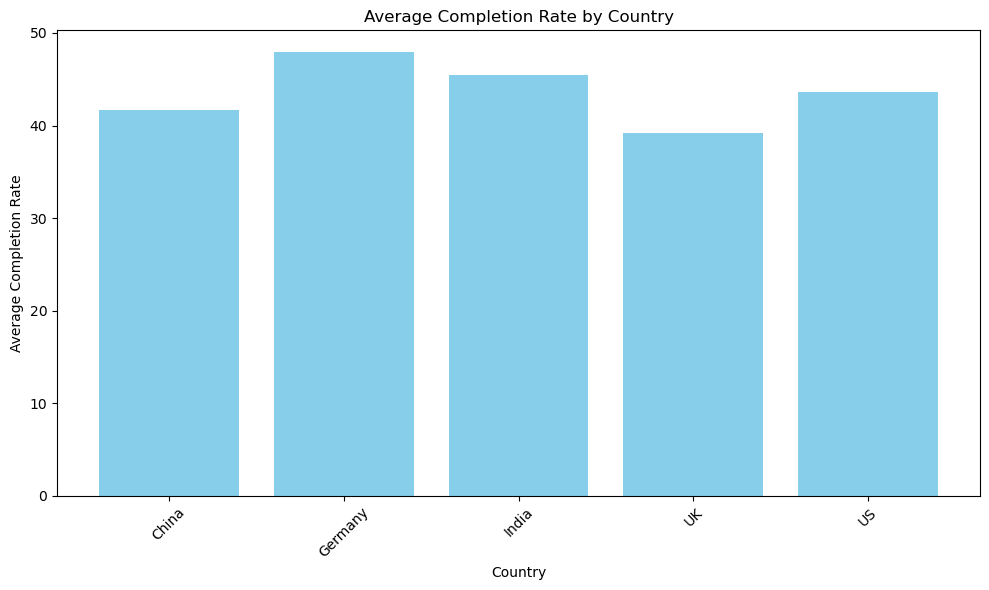

In [280]:
merged_df = pd.merge(users_df, enrollments_df, left_on='user_id', right_on='student_id')
merged_df = pd.merge(merged_df, courses_df, on='course_id')
completion_by_country = merged_df.groupby('country')['completion_rate'].mean().reset_index()

print("Completion Rates by Country:")
print(completion_by_country)

plt.figure(figsize=(10, 6))
plt.bar(completion_by_country['country'], completion_by_country['completion_rate'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
